In [ ]:
pip install opendatasets

In [ ]:
pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harshitmadan77
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:25<00:00, 113MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


import keras

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
len(os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
train_datagen= ImageDataGenerator(zoom_range= 0.5, shear_range=0.3, horizontal_flip= True, preprocessing_function= preprocess_input )

val_datagen= ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train= train_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", target_size= (256,256), batch_size=32)

val= val_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid")

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


Visualization

In [ ]:
t_img, label= train.next()

In [ ]:
def plotImage(img_arr, label):

  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/180)
    plt.show

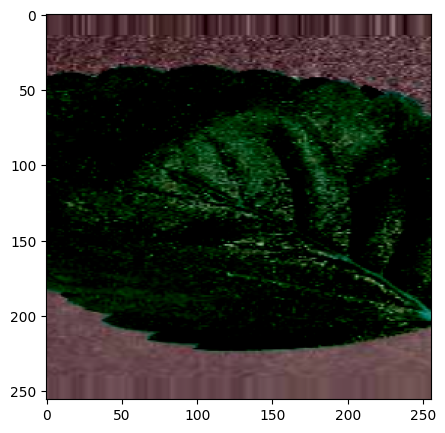

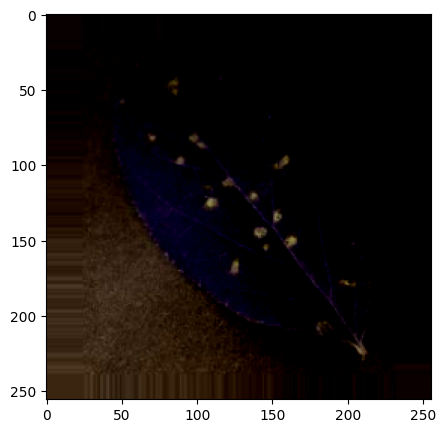

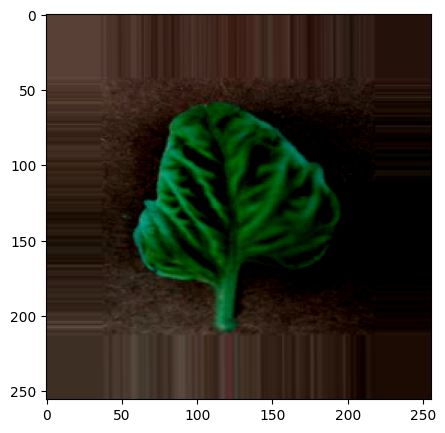

In [ ]:
plotImage(t_img[:3], label[:3])

Building Our Model

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model= VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X= Flatten()(base_model.output)

X= Dense(units= 38, activation= 'softmax')(X)

model= Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer= 'adam', loss= keras.losses.categorical_crossentropy, metrics= ['accuracy'])

EARLY STOPPING AND MODEL CHECKPOINT

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es= EarlyStopping(monitor= 'val_accuracy', min_delta= 0.01, patience= 3, verbose= 1)

mc= ModelCheckpoint(filepath= "best_model.h5",
                    monitor= 'val_accuracy',
                    min_delta= 0.01,
                    patience= 3,
                    verbose= 1,
                    save_best_only= True)

cb= [es,mc]

In [ ]:
his= model.fit(train,
               steps_per_epoch= 16,
               epochs= 50,
               verbose= 1,
               callbacks= cb,
               validation_data= val,
               validation_steps= 16)

Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 26.5951 - accuracy: 0.2012
Epoch 1: val_accuracy improved from -inf to 0.41602, saving model to best_model.h5
16/16 [==============================] - 28s 994ms/step - loss: 26.5951 - accuracy: 0.2012 - val_loss: 15.2421 - val_accuracy: 0.4160


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.4463 - accuracy: 0.4473
Epoch 2: val_accuracy improved from 0.41602 to 0.59961, saving model to best_model.h5
16/16 [==============================] - 16s 1s/step - loss: 14.4463 - accuracy: 0.4473 - val_loss: 10.0134 - val_accuracy: 0.5996
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.5203 - accuracy: 0.4980
Epoch 3: val_accuracy improved from 0.59961 to 0.64844, saving model to best_model.h5
16/16 [==============================] - 14s 875ms/step - loss: 11.5203 - accuracy: 0.4980 - val_loss: 8.6649 - val_accuracy: 0.6484
Epoch 4/50
16/16 [==============================] - ETA: 0s - loss: 10.5398 - accuracy: 0.6035
Epoch 4: val_accuracy improved from 0.64844 to 0.67578, saving model to best_model.h5
16/16 [==============================] - 16s 1s/step - loss: 10.5398 - accuracy: 0.6035 - val_loss: 9.0660 - val_accuracy: 0.6758
Epoch 5/50
16/16 [==============================] - ETA: 0s - l

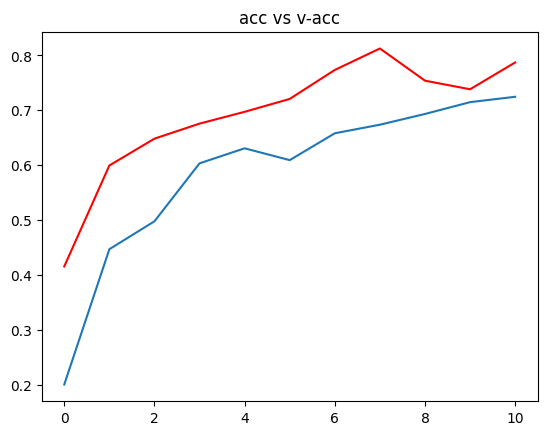

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

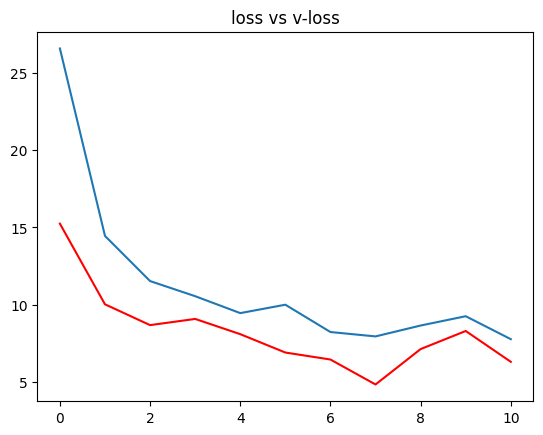

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:

from keras.models import load_model
model= load_model("/content/best_model.h5")

In [ ]:

acc= model.evaluate_generator(val)[1]

print(f"The accuracy of your model is= {acc*100}%")

<ipython-input-29-9878eaec77c9>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc= model.evaluate_generator(val)[1]


The accuracy of your model is= 77.31618285179138%


In [ ]:
ref= dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [ ]:
def prediction(path):

   img= load_img(path, target_size= (256,256))
   i= img_to_array(img)
   im= preprocess_input(i)
   img= np.expand_dims(im, axis=0)

   pred= np.argmax(model.predict(img))

   print(f"the image belongs to {ref[pred]}")


In [ ]:
path= "/content/new-plant-diseases-dataset/test/test/TomatoYellowCurlVirus1.JPG"

prediction(path)

1/1 [==============================] - 1s 663ms/step
the image belongs to Tomato___Tomato_Yellow_Leaf_Curl_Virus
